In [132]:
import pandas as pd
import numpy as np
df = pd.read_csv('baseball.csv')
df

,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,...,14,American,East,C,446,33,20,NaN,AE,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,...,375,National,West,C,632,43,10,475.0,NW,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,...,33,National,East,1B,805,40,4,91.5,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,...,138,National,East,CF,325,9,3,700.0,NE,6.551080
318,"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,...,875,American,East,2B,313,381,20,875.0,AE,6.774224
319,"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,...,146,American,West,3B,37,113,7,385.0,AW,5.953243
320,"Upshaw, Willie",Toronto,573,144,9,85,60,78,8,3198,...,332,American,East,1B,1314,131,12,960.0,AE,6.866933


In [133]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

df_first_part = df.iloc[:, :1]  
df_rest_part = df.iloc[:, 1:] 

df_encoded = pd.concat([df_first_part, encoded_cat_df, df_rest_part], axis=1)

df_encoded = df_encoded.drop(columns=cat_cols)

df_encoded


,Name,Div_AE,Div_AW,Div_NE,Div_NW,Division_East,Division_West,League_American,League_National,Position_13,...,CrHits,CrHome,CrRuns,CrRbi,CrBB,nOuts,nAssts,nError,Salary,logSalary
0,"Allanson, Andy",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,66,1,30,29,14,446,33,20,NaN,NaN
1,"Ashby, Alan",0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,835,69,321,414,375,632,43,10,475.0,6.163315
2,"Davis, Alan",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,457,63,224,266,263,880,82,14,480.0,6.173786
3,"Dawson, Andre",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1575,225,828,838,354,200,11,3,500.0,6.214608
4,"Galarraga, Andres",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,101,12,48,46,33,805,40,4,91.5,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,806,32,379,311,138,325,9,3,700.0,6.551080
318,"Randolph, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1511,39,897,451,875,313,381,20,875.0,6.774224
319,"Tolleson, Wayne",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,433,7,217,93,146,37,113,7,385.0,5.953243
320,"Upshaw, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,857,97,470,420,332,1314,131,12,960.0,6.866933


In [134]:
df_forcorr=df_encoded.drop(columns=['Name'])
correlations = df_forcorr.corr()['Salary'].drop(columns=['Salary','Name'])
relevant_features = correlations[correlations.abs() > 0.5].index.tolist()
relevant_features

['nHits',
 'nRBI',
 'nBB',
 'CrAtBat',
 'CrHits',
 'CrHome',
 'CrRuns',
 'CrRbi',
 'CrBB',
 'Salary',
 'logSalary']

In [135]:
from sklearn.impute import KNNImputer
import numpy as np

# Пересоздание 'logSalary'
df_encoded['logSalary'] = np.log1p(df_encoded['Salary'])

# Инициализация KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Применение импутации
df_encoded[relevant_features] = imputer.fit_transform(df_encoded[relevant_features])

# Округление 'Salary' до 1 знака после запятой
df_encoded['Salary'] = df_encoded['Salary'].round(1)
df_encoded['logSalary']=np.log1p(df_encoded['Salary'])
df_encoded


,Name,Div_AE,Div_AW,Div_NE,Div_NW,Division_East,Division_West,League_American,League_National,Position_13,...,CrHits,CrHome,CrRuns,CrRbi,CrBB,nOuts,nAssts,nError,Salary,logSalary
0,"Allanson, Andy",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,66.0,1.0,30.0,29.0,14.0,446,33,20,78.3,4.373238
1,"Ashby, Alan",0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,835.0,69.0,321.0,414.0,375.0,632,43,10,475.0,6.165418
2,"Davis, Alan",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,457.0,63.0,224.0,266.0,263.0,880,82,14,480.0,6.175867
3,"Dawson, Andre",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1575.0,225.0,828.0,838.0,354.0,200,11,3,500.0,6.216606
4,"Galarraga, Andres",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,101.0,12.0,48.0,46.0,33.0,805,40,4,91.5,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,806.0,32.0,379.0,311.0,138.0,325,9,3,700.0,6.552508
318,"Randolph, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1511.0,39.0,897.0,451.0,875.0,313,381,20,875.0,6.775366
319,"Tolleson, Wayne",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,433.0,7.0,217.0,93.0,146.0,37,113,7,385.0,5.955837
320,"Upshaw, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,857.0,97.0,470.0,420.0,332.0,1314,131,12,960.0,6.867974


In [136]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = [
    'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
    'logSalary', 'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
    'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
]


scaler = MinMaxScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded[numeric_cols].describe().T[['min', 'max']]


,min,max
CrAtBat,0.0,1.0
CrBB,0.0,1.0
CrHits,0.0,1.0
CrHome,0.0,1.0
CrRbi,0.0,1.0
CrRuns,0.0,1.0
logSalary,0.0,1.0
Salary,0.0,1.0
nAssts,0.0,1.0
nAtBat,0.0,1.0


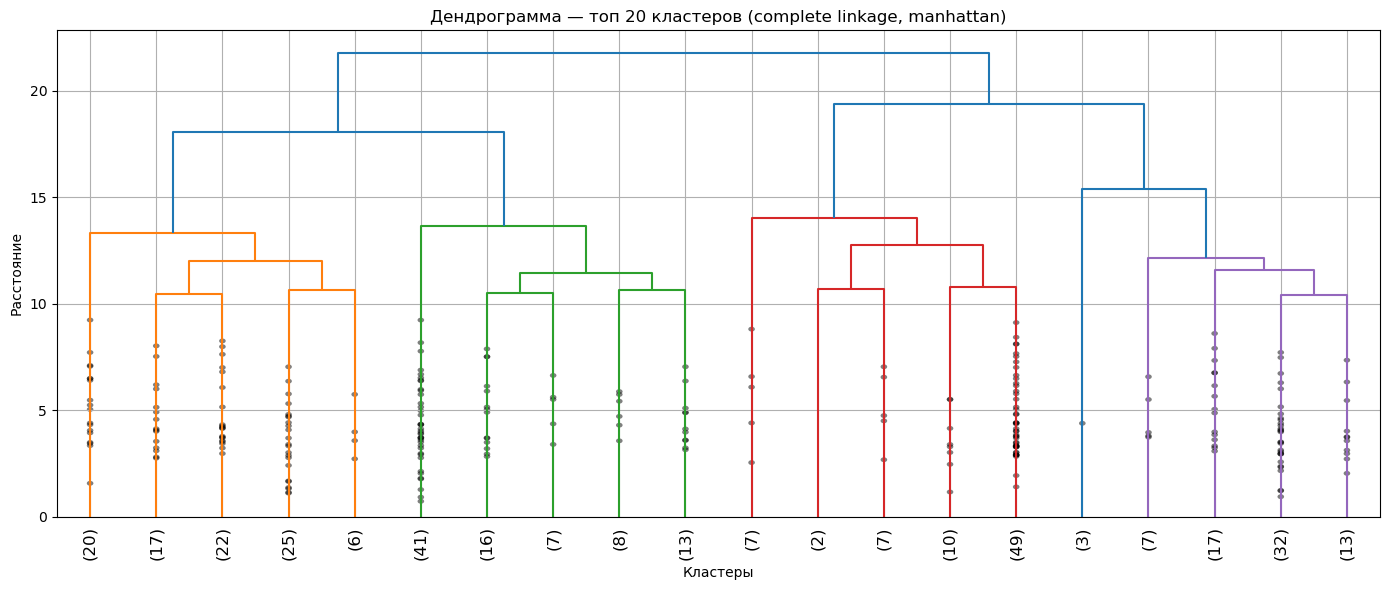

In [137]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

X = df_encoded.drop(columns=['Name'])

distance_matrix = pdist(X, metric='cityblock')

linkage_matrix = sch.linkage(distance_matrix, method='complete')  

plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.title("Дендрограмма — топ 20 кластеров (complete linkage, manhattan)")
plt.xlabel("Кластеры")
plt.ylabel("Расстояние")
plt.grid(True)
plt.tight_layout()
plt.show()


## Формулы для кластеризации

### Манхэттенское расстояние (Manhattan distance)

Манхэттенское расстояние между двумя точками \( x = (x_1, x_2, ..., x_n) \) и \( y = (y_1, y_2, ..., y_n) \):

$$
D_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

---

### Complete Linkage (полное соединение)

Расстояние между двумя кластерами \( A \) и \( B \) при использовании метода полного соединения (complete linkage) определяется как:

$$
D_{\text{complete}}(A, B) = \max_{a \in A, b \in B} D(a, b)
$$

где \( D(a, b) \) — расстояние между точками \( a \) и \( b \).

---

### Индекс Pseudo-F

Индекс Pseudo-F (Calinski-Harabasz index) для оценки качества кластеризации:

$$
F = \frac{B(k) / (k - 1)}{W(k) / (N - k)}
$$

где:

- \( B(k) \) — межкластерная дисперсия (between-cluster dispersion)
- \( W(k) \) — внутрикластерная дисперсия (within-cluster dispersion)
- \( k \) — количество кластеров
- \( N \) — общее количество объектов

Интерпретация:
- Чем выше значение \( F \), тем качественнее кластеризация.

---

### Напоминание

- Выбираем **первый локальный максимум** графика зависимости \( F \) от \( k \) — он соответствует оптимальному количеству кластеров.


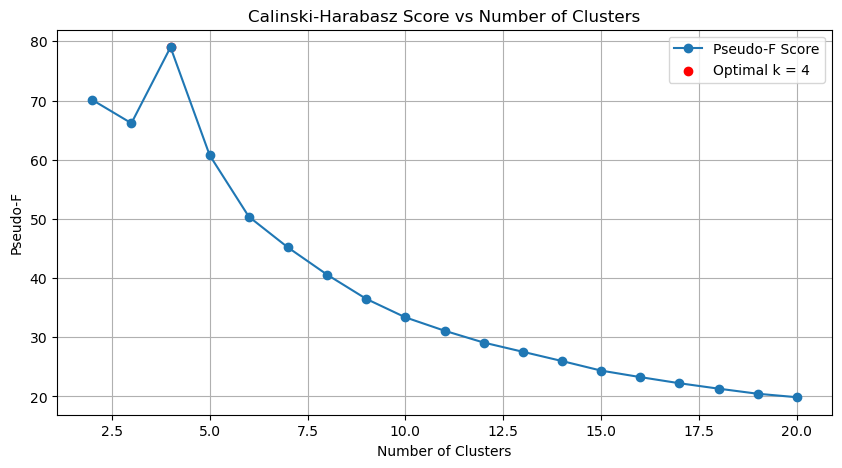

Оптимальное число кластеров: 4


In [139]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

X_scaled=df_encoded.drop(columns='Name')
Z=linkage_matrix

pseudoF_scores = []
cluster_range = range(2, 21)

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = calinski_harabasz_score(X_scaled, labels)
    pseudoF_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, pseudoF_scores, marker='o', label='Pseudo-F Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Pseudo-F')
plt.title('Calinski-Harabasz Score vs Number of Clusters')


scores_array = np.array(pseudoF_scores)
local_maxima = argrelextrema(scores_array, np.greater)[0]

best_k = cluster_range[local_maxima[0]]
best_score = pseudoF_scores[local_maxima[0]]
plt.scatter(best_k, best_score, color='red', label=f'Optimal k = {best_k}')

plt.legend()
plt.grid(True)
plt.show()

print(f'Оптимальное число кластеров: {best_k}')


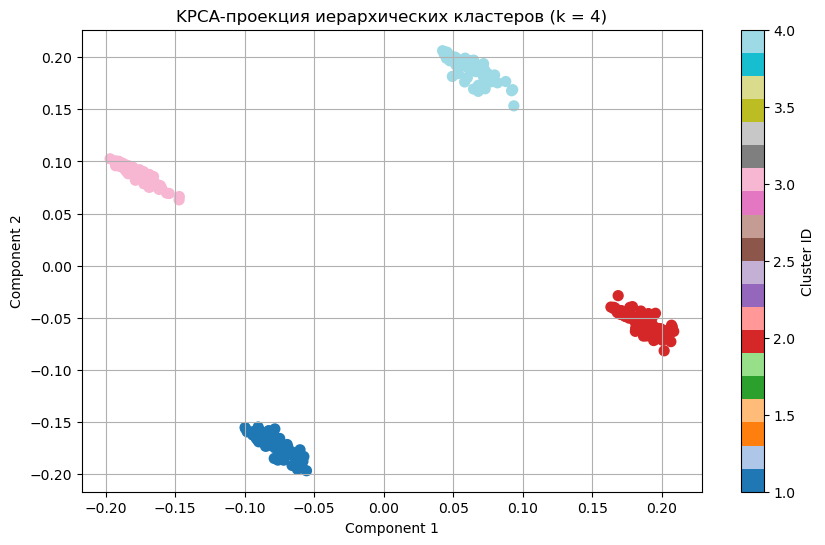

In [140]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# 1. Построим проекцию через KPCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # можно пробовать kernel='linear', 'poly', 'sigmoid' тоже
X_kpca = kpca.fit_transform(X_scaled)

# 2. Разделение на кластеры (используем Z — результат linkage)
from scipy.cluster.hierarchy import fcluster

k = best_k  # подставляем оптимальное количество кластеров из прошлого шага
labels = fcluster(Z, k, criterion='maxclust')

# 3. Рисуем точки с цветами по кластерам
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=labels, cmap='tab20', s=50)
plt.title(f'KPCA-проекция иерархических кластеров (k = {k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


In [ ]:
from scipy.spatial.distance import cdist

df_clusters = df.copy()
df_clusters['cluster'] = labels

typical_players = []

for cl in range(1, k + 1):
    cluster_data = X_scaled[df_clusters['cluster'] == cl]
    cluster_names = df_clusters[df_clusters['cluster'] == cl]['Name'].values
    
    centroid = cluster_data.mean(axis=0).values.reshape(1, -1)
    
    distances = cdist(cluster_data, centroid, metric='euclidean').flatten()
    closest_index = distances.argmin()
    typical_players.append((cl, cluster_names[closest_index]))

print("Наиболее типичные игроки по кластерам:")
for cluster_id, name in typical_players:
    print(f"Кластер {cluster_id}: {name}")


Наиболее типичные игроки по кластерам:
Кластер 1: Henderson, Dave
Кластер 2: Hassey, Ron
Кластер 3: Esasky, Nick
Кластер 4: Wilson, Mookie


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import KernelPCA
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def process_and_cluster(df, cat_cols, num_cols, n_clusters_range=(2, 21), k=3):
    # 1. Преобразуем категориальные переменные в числовые с помощью OneHotEncoderx
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = encoder.fit_transform(df[cat_cols])
    encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))
    
    # 2. Нормализуем числовые данные с помощью MinMaxScaler
    scaler = MinMaxScaler()
    scaled_num_data = scaler.fit_transform(df[num_cols])
    scaled_num_df = pd.DataFrame(scaled_num_data, columns=num_cols)
    
    # 3. Объединяем данные обратно
    df_scaled = pd.concat([scaled_num_df, encoded_cat_df], axis=1)
    
    # 4. Заполнение пропусков с использованием KNNImputer
    imputer = KNNImputer(n_neighbors=k)
    df_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)
    
    # 5. Выбираем только те признаки, которые имеют корреляцию > 0.4
    corr_matrix = df_scaled_imputed.corr()
    relevant_cols = corr_matrix.columns[corr_matrix.abs().max() > 0.4].tolist()
    df_scaled_imputed = df_scaled_imputed[relevant_cols]
    
    # 6. Строим иерархическую кластеризацию
    Z = linkage(df_scaled_imputed, method='complete', metric='cityblock')
    
    # 7. Выбираем оптимальное количество кластеров по метрике Calinski-Harabasz
    best_k = None
    best_score = -np.inf
    scores = []
    
    for k in range(n_clusters_range[0], n_clusters_range[1]):
        labels = fcluster(Z, k, criterion='maxclust')
        score = calinski_harabasz_score(df_scaled_imputed, labels)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_k = k
    
    # 8. Построение графика метрики
    plt.plot(range(n_clusters_range[0], n_clusters_range[1]), scores)
    plt.xlabel('Число кластеров')
    plt.ylabel('Метрика Calinski-Harabasz')
    plt.title(f'Метрика по числу кластеров (Лучший k = {best_k})')
    plt.show()
    
    # 9. Проекция через Kernel PCA
    kpca = KernelPCA(n_components=2, kernel='rbf')
    X_kpca = kpca.fit_transform(df_scaled_imputed)
    
    # 10. Кластеризация с выбранным k
    labels = fcluster(Z, best_k, criterion='maxclust')
    
    # 11. Визуализация кластеров
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=labels, cmap='tab20', s=50)
    plt.title(f'KPCA-проекция иерархических кластеров (k = {best_k})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.show()
    
    # 12. Нахождение типичных игроков в каждом кластере
    df_scaled_imputed['cluster'] = labels
    typical_players = []
    
    for cl in range(1, best_k + 1):
        cluster_data = df_scaled_imputed[df_scaled_imputed['cluster'] == cl]
        cluster_names = df[df_scaled_imputed['cluster'] == cl]['Name'].values
        centroid = cluster_data.mean(axis=0).values.reshape(1, -1)
        distances = cdist(cluster_data, centroid, metric='euclidean').flatten()
        closest_index = distances.argmin()
        typical_players.append((cl, cluster_names[closest_index]))
    
    # Печать результатов
    print("Наиболее типичные игроки по кластерам:")
    for cluster_id, name in typical_players:
        print(f"Кластер {cluster_id}: {name}")
    
    return best_k, typical_players


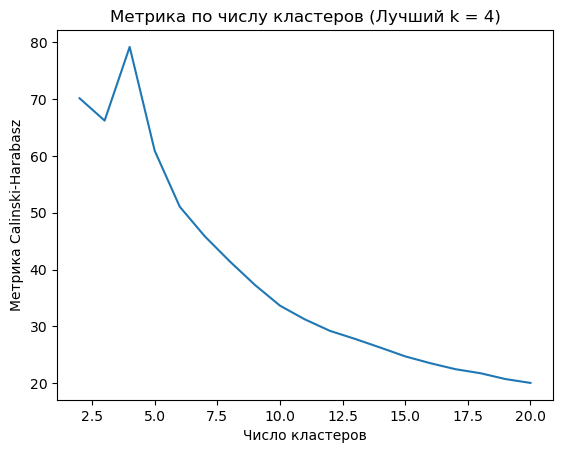

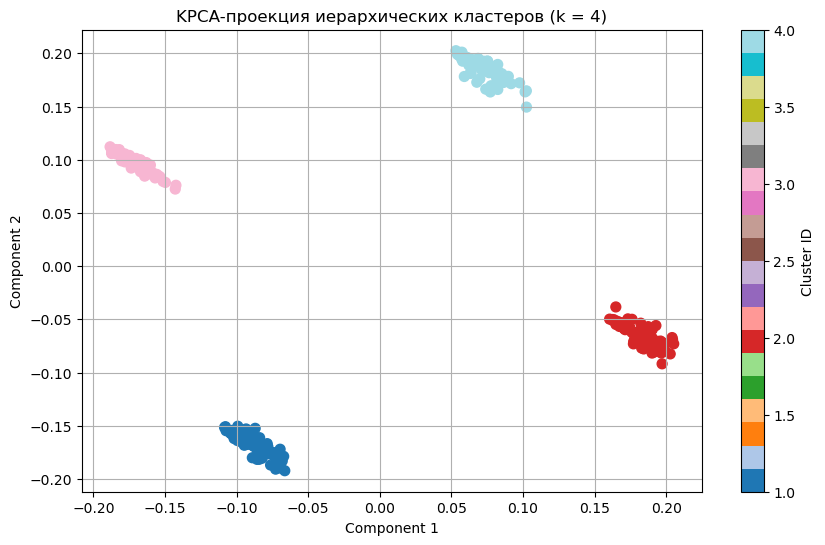

Наиболее типичные игроки по кластерам:
Кластер 1: Henderson, Dave
Кластер 2: Hassey, Ron
Кластер 3: Esasky, Nick
Кластер 4: Wilson, Mookie


In [152]:
cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']
num_cols = ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'logSalary', 'nAssts', 'nAtBat', 'nBB', 'nError', 'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor', 'Salary']
best_k, typical_players = process_and_cluster(df, cat_cols, num_cols)
